In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astroquery.xmatch import XMatch
import matplotlib.cm as cm
from astropy.coordinates import SkyCoord

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
inp = Table(ascii.read('dr25_stellar_supp_gaia_clean_B20_binaries.txt'))

In [3]:
print(inp.keys())

['kepid', 'tm_designation', 'teff_dr25', 'teff_err1_dr25', 'teff_err2_dr25', 'logg_dr25', 'logg_err1_dr25', 'logg_err2_dr25', 'feh_dr25', 'feh_err1_dr25', 'feh_err2_dr25', 'mass_dr25', 'mass_err1_dr25', 'mass_err2_dr25', 'radius_dr25', 'radius_err1_dr25', 'radius_err2_dr25', 'dens_dr25', 'dens_err1_dr25', 'dens_err2_dr25', 'prov_sec', 'kepmag', 'limbdark_coeff1', 'limbdark_coeff2', 'limbdark_coeff3', 'limbdark_coeff4', 'dist_dr25', 'dist_err1_dr25', 'dist_err2_dr25', 'nconfp', 'nkoi', 'ntce', 'datalink_dvr', 'st_delivname', 'st_vet_date_str', 'ra', 'dec', 'st_quarters', 'teff_prov', 'logg_prov', 'feh_prov', 'jmag', 'jmag_err', 'hmag', 'hmag_err', 'kmag', 'kmag_err', 'dutycycle', 'dataspan', 'mesthres01p5', 'mesthres02p0', 'mesthres02p5', 'mesthres03p0', 'mesthres03p5', 'mesthres04p5', 'mesthres05p0', 'mesthres06p0', 'mesthres07p5', 'mesthres09p0', 'mesthres10p5', 'mesthres12p0', 'mesthres12p5', 'mesthres15p0', 'rrmscdpp01p5', 'rrmscdpp02p0', 'rrmscdpp02p5', 'rrmscdpp03p0', 'rrmscdpp03p

In [4]:
dist_err_max = np.array([max(inp['dist_err1'][n], inp['dist_err2'][n]) for n in range(len(inp))])
inp_fgk = inp[np.where((inp['Evol'] == 0) & (inp['teff_dr25'] <= 7000) & (inp['teff_dr25'] > 4000) & (inp['logg_dr25'] >= 4) & ((inp['RUWE'] > 1.2)) & (dist_err_max/inp['dist'] <= 0.1))]

In [27]:
coords = SkyCoord(inp_fgk[0]['ra'], inp_fgk[0]['dec'], frame='icrs', unit='deg')

for n in range(5):
    print(n)
    target = inp_fgk[n]
    coords = SkyCoord(target['ra'], target['dec'], frame='icrs', unit='deg').to_string('hmsdms')
    mass = str(target['mass'])
    !python BinaryStarGUI.py -v --ruwe {inp_fgk['Gaia'][n]} {coords[:14]} -- {coords[15:]} 10000 {mass}

0
Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Star RA: 19h06m45.5568s
Star DEC: +46d56m31.7832s
Star Mass: 0.953
Generating Companions..
Generation Mass Ratio Exponent:  0.0
Companions Generated
Number of companions: 10000
Analyzing RUWE...
The star has ln(ruwe) of 0.558250.
Total number of surviving binaries: 9032
Surviving binary parameters saved to: 2130645799951052160_kept.csv
1
Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Star RA: 18h51m44.3712s
Star DEC: +47d07m24.6288s
Star Mass: 0.835
Generating Companions..
Generation Mass Ratio Exponent:  0.0
Companions Generated
Number of companions: 10000
Analyzing RUWE...
The star has ln(ruwe) of 0.372730.
Total nu

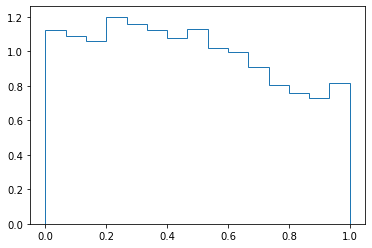

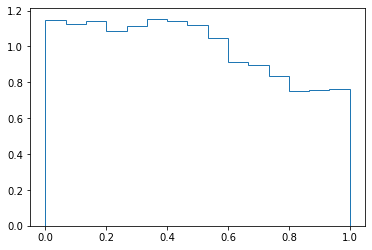

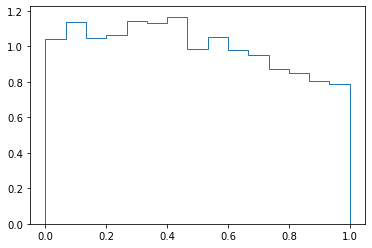

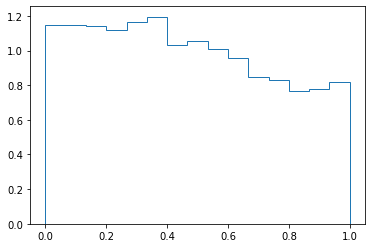

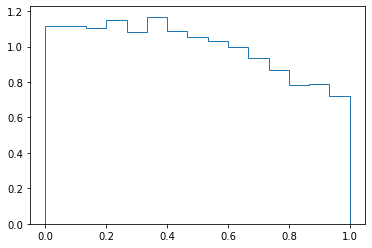

In [32]:
for n in range(5):
    target = inp_fgk[n]
    molusc_output = Table(ascii.read(str(target['Gaia']) + '_kept.csv'))
    
    fig, ax = plt.subplots()
    ax.hist(molusc_output['mass ratio'], bins = 15, histtype = 'step', density = True)
    

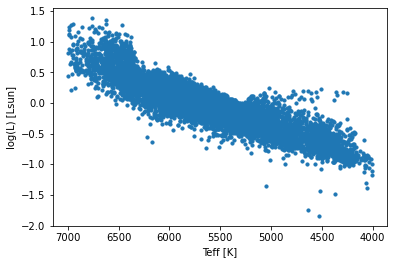

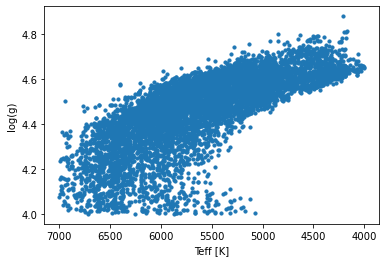

In [6]:
plt.scatter(inp_fgk['teff_dr25'], inp_fgk['Lstar'], s = 10)
plt.gca().invert_xaxis()
plt.xlabel('Teff [K]')
plt.ylabel('log(L) [Lsun]')
plt.show()

plt.scatter(inp_fgk['teff_dr25'], inp_fgk['logg_dr25'], s = 10)
plt.gca().invert_xaxis()
plt.xlabel('Teff [K]')
plt.ylabel('log(g)')
plt.show()

In [7]:
print(len(inp_fgk), len(inp))

7533 16586


(array([3.692e+03, 1.330e+03, 8.180e+02, 5.470e+02, 3.830e+02, 2.670e+02,
        1.750e+02, 1.140e+02, 7.900e+01, 5.700e+01, 3.300e+01, 2.600e+01,
        9.000e+00, 1.000e+00, 2.000e+00]),
 array([1.2001 , 1.48868, 1.77726, 2.06584, 2.35442, 2.643  , 2.93158,
        3.22016, 3.50874, 3.79732, 4.0859 , 4.37448, 4.66306, 4.95164,
        5.24022, 5.5288 ]),
 <BarContainer object of 15 artists>)

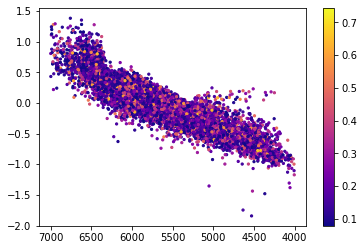

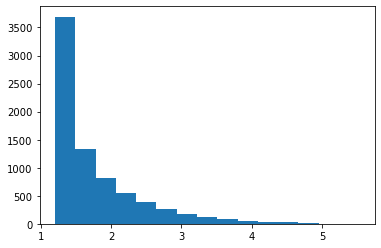

In [8]:
plt.figure()
plt.scatter(inp_fgk['teff_dr25'], inp_fgk['Lstar'], s = 5, c = np.log10(inp_fgk['RUWE']), cmap = plt.cm.plasma)
plt.colorbar()
plt.gca().invert_xaxis()

plt.figure()
plt.hist(inp_fgk['RUWE'], bins = 15)

In [9]:
fgk_dr3_xmatch = XMatch.query(cat1=inp_fgk['ra', 'dec'],

                     cat2='vizier:I/355/gaiadr3',

                     max_distance = 0.75 * u.arcsec, colRA1='ra',

                     colDec1='dec')

In [10]:
fgk_dr3_xmatch.keys()

['angDist',
 'ra',
 'dec',
 'DR3Name',
 'RAdeg',
 'DEdeg',
 'errHalfMaj',
 'errHalfMin',
 'errPosAng',
 'SolID',
 'Source',
 'RandomI',
 'e_RAdeg',
 'e_DEdeg',
 'Plx',
 'e_Plx',
 'RPlx',
 'PM',
 'pmRA',
 'e_pmRA',
 'pmDE',
 'e_pmDE',
 'RADEcor',
 'RAPlxcor',
 'RApmRAcor',
 'RApmDEcor',
 'DEPlxcor',
 'DEpmRAcor',
 'DEpmDEcor',
 'PlxpmRAcor',
 'PlxpmDEcor',
 'pmRApmDEcor',
 'NAL',
 'NAC',
 'NgAL',
 'NbAL',
 'gofAL',
 'chi2AL',
 'epsi',
 'sepsi',
 'Solved',
 'APF',
 'nueff',
 'pscol',
 'e_pscol',
 'RApscolCorr',
 'DEpscolCorr',
 'PlxpscolCorr',
 'pmRApscolCorr',
 'pmDEpscolCorr',
 'MatchObsA',
 'Nper',
 'amax',
 'MatchObs',
 'IPDgofha',
 'IPDgofhp',
 'IPDfmp',
 'IPDfow',
 'RUWE',
 'Dup',
 'o_Gmag',
 'FG',
 'e_FG',
 'RFG',
 'Gmag',
 'e_Gmag',
 'o_BPmag',
 'FBP',
 'e_FBP',
 'RFBP',
 'BPmag',
 'e_BPmag',
 'o_RPmag',
 'FRP',
 'e_FRP',
 'RFRP',
 'RPmag',
 'e_RPmag',
 'E(BP/RP)',
 'NBPcont',
 'NBPblend',
 'NRPcont',
 'NRPblend',
 'Mode',
 'BP-RP',
 'BP-G',
 'G-RP',
 'RV',
 'e_RV',
 'n_RV',
 'o_

In [11]:
len(fgk_dr3_xmatch), len(inp_fgk)

(7515, 7533)

In [12]:
abs_gmag = fgk_dr3_xmatch['Gmag'] + 5 + 5 * np.log10(fgk_dr3_xmatch['Plx'])

/Users/ksullivan/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/ksullivan/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


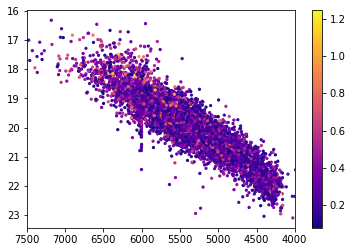

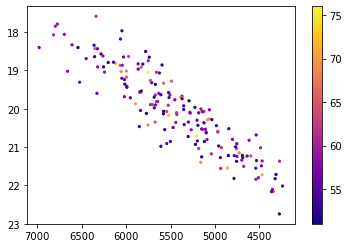

In [13]:
plt.scatter(fgk_dr3_xmatch['Teff'][np.where(fgk_dr3_xmatch['RUWE'] > 1.2)], abs_gmag[np.where(fgk_dr3_xmatch['RUWE'] > 1.2)], s = 5, c = np.log10(fgk_dr3_xmatch['RUWE'][np.where(fgk_dr3_xmatch['RUWE'] > 1.2)]), cmap = plt.cm.plasma)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlim(7500, 4000)
plt.colorbar()

plt.figure()
plt.scatter(fgk_dr3_xmatch['Teff'][np.where(fgk_dr3_xmatch['IPDfmp'] > 50)], abs_gmag[np.where(fgk_dr3_xmatch['IPDfmp'] > 50)], s = 5, c = fgk_dr3_xmatch['IPDfmp'][np.where(fgk_dr3_xmatch['IPDfmp'] > 50)], cmap = plt.cm.plasma)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()


In [67]:
gaia_nss = Table(ascii.read('gaia_dr3_SB2.tsv'))

In [71]:
apogee_sb2_redundant = Table(fits.open('apogee_sb2s-v1_0.fits')[1].data)

In [72]:
apogee_sb2 = Table(apogee_sb2_redundant[:][0])

for n in range(len(apogee_sb2_redundant)):
    if apogee_sb2_redundant['OBJID'][n] not in apogee_sb2['OBJID']:
        apogee_sb2.add_row(apogee_sb2_redundant[n])

In [73]:
apogee_dr3_xmatch = XMatch.query(cat1=apogee_sb2['RA', 'DEC'],

                     cat2='vizier:I/355/gaiadr3',

                     max_distance=0.5 * u.arcsec, colRA1='RA',

                     colDec1='DEC')

In [79]:
len(apogee_dr3_xmatch[np.where(apogee_dr3_xmatch['RUWE'] > 1.2)])

1834

In [ ]:
apogee_nss_xmatch = XMatch.query(cat1=apogee_sb2['RA', 'DEC'],

                     cat2='vizier:I/357/tbosb2',

                     max_distance=1 * u.arcsec, colRA1='RA',

                     colDec1='DEC')

In [ ]:
apogee_nss_xmatch

In [75]:
fgk_apogee_gaia = []

for n in range(len(apogee_dr3_xmatch)):
    nss = apogee_dr3_xmatch['DR3Name'][n]
    for k in range(len(fgk_dr3_xmatch)):
        dr3 = fgk_dr3_xmatch['DR3Name'][k]
        if nss == dr3:
            fgk_apogee_gaia.append(int(dr3[9:]))

In [77]:
print(fgk_apogee_gaia, len(fgk_apogee_gaia))

[2106386553354297600, 2106310755771353216, 2099223166380421248, 2132630006123071872, 2052599058702797824, 2130091573074168192, 2128369806586243328, 2077782655281094400, 2052190972395726464, 2128546557378063360, 2078176005566547200, 2078042135721986944, 2086842287495908864, 2078642129781021440, 2073902341318849152, 2075087133820361088, 2085223084828005504, 2076082294913324416] 18


In [ ]:
fgk_gaia_apogee_xmatch = np.array([np.where(int(fgk_dr3_xmatch['DR3Name'][n][9:]) == fgk_apogee_gaia) for n in range(len(fgk_dr3_xmatch))])

In [ ]:
fgk_gaia_apogee_xmatch

In [ ]:
fgk_dr3 = inp_fgk[fgk_gaia_apogee_xmatch]

In [ ]:
print(fgk_dr3)